### Loading clean data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()

In [2]:
data = pd.read_csv('dat6.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'application', 'battery', 'id', 'session', 'duration_s',
       'app_name', 'startTime', 'startTimeMillis', 'endTime', 'endTimeMillis',
       'date', 'newid', 'ids'],
      dtype='object')

In [4]:
del data['Unnamed: 0']

In [5]:
del data['id']

In [6]:
del data['battery']

### Number of devices/users having active apps

In [7]:
app_list = list(data.app_name.unique())

In [8]:
len(app_list)

78

In [10]:
count_app = []
for app in app_list:
    df = data.loc[data.app_name == app,:]
    no_of_dev = len(df.newid.unique())
    count_app.append(no_of_dev)

In [11]:
data_no_of_dev = pd.DataFrame({'app': app_list, 'no_of_dev': count_app})

In [12]:
data_no_of_dev = data_no_of_dev.sort_values('no_of_dev', ascending = False)

In [13]:
data_no_of_dev['percent'] = round(data_no_of_dev['no_of_dev']/2009*100, 2)

In [14]:
data_no_of_dev.tail(10)

,app,no_of_dev,percent
9,Recorder,16,0.80
70,Samsung_Smart_View,11,0.55
39,Station finder,9,0.45
36,Jive Daily,7,0.35
40,Spencer_for_Proximus,6,0.30
73,Proximus_Cloud,4,0.20
75,Office Remote,4,0.20
76,OpenScape_Mobile,3,0.15
5,Day_counter,1,0.05
77,Etmaal_2018,1,0.05


In [15]:
data_no_of_dev.head(10)

,app,no_of_dev,percent
8,Google,1962,97.66
31,Map,1856,92.38
4,WhatsApp,1840,91.59
19,Email,1796,89.40
15,YouTube,1751,87.16
6,Photos,1741,86.66
3,Messenger,1664,82.83
16,Google Play,1627,80.99
21,Google_Drive,1593,79.29
0,Facebook,1544,76.85


In [16]:
del data_no_of_dev['no_of_dev']
dtf = data_no_of_dev.set_index('app')

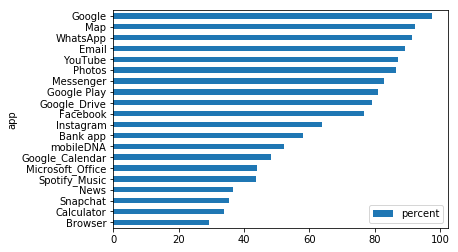

In [18]:
%matplotlib inline
dtf.head(20).sort_values('percent').plot.barh()
plt.show()

In [35]:
len(dtf.loc[dtf.percent>=0.5,:])

13

In [36]:
len(dtf.loc[dtf.percent<0.1,:])

34

In [39]:
list(data_no_of_dev.head(10).app)

['Google',
 'Map',
 'WhatsApp',
 'Email',
 'YouTube',
 'Photos',
 'Messenger',
 'Google Play',
 'Google_Drive',
 'Facebook']

### Duration

In [42]:
data_dur = data.groupby('app_name')['duration_s'].sum().sort_values(ascending = False)

In [43]:
data_dur.head()

app_name
Facebook     5.046330e+07
Google       3.875380e+07
WhatsApp     2.599464e+07
YouTube      2.074078e+07
Instagram    2.046671e+07
Name: duration_s, dtype: float64

In [63]:
data_dur_df = pd.DataFrame(data_dur)

In [64]:
data_dur_df['duration_h'] = round(data_dur_df['duration_s']/3600, 2)

In [65]:
del data_dur_df['duration_s']

In [68]:
data_dur_df.head(10)

,duration_h
app_name,
Facebook,14017.58
Google,10764.95
WhatsApp,7220.73
YouTube,5761.33
Instagram,5685.20
Messenger,3346.19
Email,2800.14
Waze,2796.49
Snapchat,2692.90


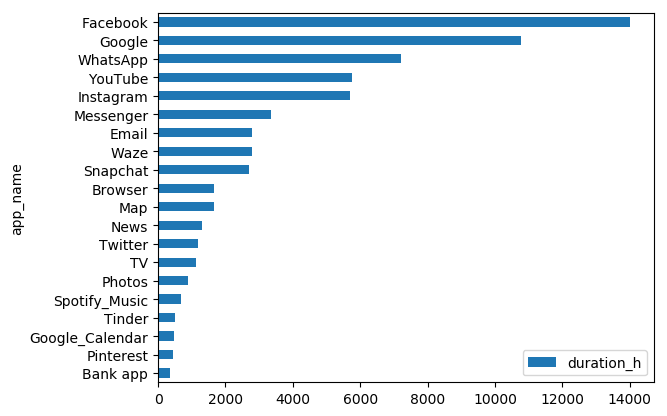

In [54]:
data_dur_df.head(20).sort_values('duration_h').plot.barh()
plt.show()

In [71]:
data_no_of_dev = pd.DataFrame({'app_name': app_list, 'no_of_dev': count_app})
dtf = data_no_of_dev.set_index('app_name')

In [72]:
result = pd.merge(data_dur_df, dtf, on='app_name')

In [78]:
result['average_m_dev'] = round(result['duration_h']/result['no_of_dev']/(3*7) * 60, 2)

In [80]:
del result['average_h_dev']

In [82]:
result.sort_values('average_m_dev', ascending = False).head(10)

,duration_h,no_of_dev,average_m_dev
app_name,,,
Facebook,14017.58,1544,25.94
Google,10764.95,1962,15.68
Waze,2796.49,567,14.09
Instagram,5685.20,1287,12.62
WhatsApp,7220.73,1840,11.21
Snapchat,2692.90,711,10.82
YouTube,5761.33,1751,9.40
Browser,1672.86,587,8.14
Tinder,508.59,189,7.69


In [93]:
total_h = sum(data_dur_df['duration_h'])

In [94]:
top10 = sum(data_dur_df.head(10)['duration_h'])

In [95]:
top10/total_h

0.8336207615717408

### Recording

In [84]:
count_record = []
for app in app_list:
    df = data.loc[data.app_name == app,:]
    n = len(df.index)
    count_record.append(n)

In [87]:
data_record = pd.DataFrame({'app_name': app_list, 'no_of_record': count_record}).sort_values('no_of_record',
                                                                                            ascending = False)

In [97]:
list(data_record.head(10).app_name)

['WhatsApp',
 'Facebook',
 'Google',
 'Messenger',
 'Email',
 'Instagram',
 'Snapchat',
 'Photos',
 'YouTube',
 'Browser']

In [99]:
data_record.head(10)

,app_name,no_of_record
4,WhatsApp,691189
0,Facebook,566570
8,Google,517562
3,Messenger,367475
19,Email,309966
2,Instagram,285757
1,Snapchat,202466
6,Photos,88418
15,YouTube,68001
20,Browser,63975


### Try to explore 3 most apps for communication: Messenger, WhatsApp, Snapchat...

In [98]:
mess = data.loc[data.app_name == 'Messenger',:]
wats = data.loc[data.app_name == 'WhatsApp',:]
snap = data.loc[data.app_name == 'Snapchat',:]

In [100]:
setid_mess = set(mess.newid)
setid_wats = set(wats.newid)
setid_snap = set(snap.newid)

In [101]:
len(setid_mess)

1664

In [102]:
len(setid_wats)

1840

In [103]:
len(setid_snap)

711

In [104]:
len(setid_mess & setid_wats)

1523

In [105]:
len(setid_mess & setid_snap)

671

In [106]:
len(setid_snap & setid_wats)

642